<a href="https://colab.research.google.com/github/park-geun-hyeong/first_deeplearning_fromkeras/blob/main/text_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras 
from keras.datasets import reuters
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=100,test_split=0.2)
print(len(x_train))
print(len(x_test))

2113536/2110848 [==============================] - 0s 0us/step
8982
2246


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]


In [5]:
reuters_word_idx=reuters.get_word_index()
print(len(reuters_word_idx))

30979


In [6]:
r_word_idx= dict([(value,key)for(key,value)in reuters_word_idx.items()])
for i in range(1,6):
    print(r_word_idx[i])

the
of
to
in
said


In [7]:
for key in x_train[0]:
    print(r_word_idx[key], end=' ')

the of of mln loss for of said at of of said of of 1 of of april 0 a after said from of and from of 000 april 0 prices its of year a but in this mln of an of of and of and revs vs 000 its of vs 000 a but 3 of of of and of and of vs 000 its of 4 vs 000 1 mln of of april 0 are 2 of will billion of and of 000 pct dlrs 

In [9]:
from keras.utils.np_utils import to_categorical
y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)

print(y_train[0])
print(y_train_oh[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
def vectorize_sequence(sequences, dimension=100):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [11]:
x_train_vec=vectorize_sequence(x_train)
x_test_vec=vectorize_sequence(x_test)

print(x_train[0])
print(x_train_vec[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [13]:
inputs=Input(shape=(100,))
outputs=Dense(46,activation='softmax')(inputs)

model_v1=Model(inputs,outputs)

model_v1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [14]:
history=model_v1.fit(x_train_vec, y_train_oh, batch_size=32,epochs=30,verbose=1,validation_split=0.1)

Epoch 1/30
253/253 [==============================] - 1s 2ms/step - loss: 3.0213 - accuracy: 0.2756 - val_loss: 2.0489 - val_accuracy: 0.4972
Epoch 2/30
253/253 [==============================] - 0s 1ms/step - loss: 1.8434 - accuracy: 0.5323 - val_loss: 1.7851 - val_accuracy: 0.5984
Epoch 3/30
253/253 [==============================] - 0s 1ms/step - loss: 1.5920 - accuracy: 0.6073 - val_loss: 1.6586 - val_accuracy: 0.6240
Epoch 4/30
253/253 [==============================] - 0s 1ms/step - loss: 1.5163 - accuracy: 0.6233 - val_loss: 1.5907 - val_accuracy: 0.6440
Epoch 5/30
253/253 [==============================] - 0s 1ms/step - loss: 1.3852 - accuracy: 0.6577 - val_loss: 1.5504 - val_accuracy: 0.6507
Epoch 6/30
253/253 [==============================] - 0s 1ms/step - loss: 1.2841 - accuracy: 0.6826 - val_loss: 1.5270 - val_accuracy: 0.6730
Epoch 7/30
253/253 [==============================] - 0s 1ms/step - loss: 1.2769 - accuracy: 0.6926 - val_loss: 1.5089 - val_accuracy: 0.6763
Epoch 

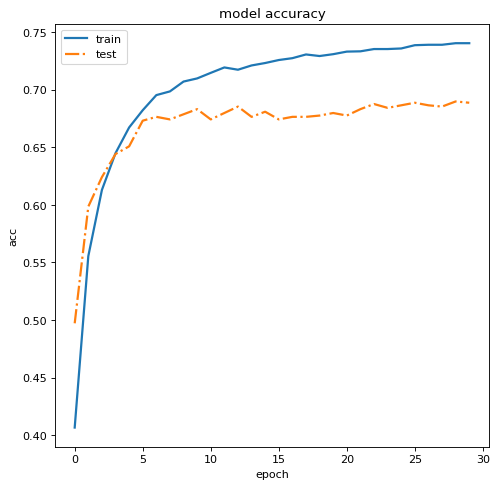

In [24]:
plt.figure(figsize=(7,7),dpi=80, facecolor='w',edgecolor='k')
plt.plot(history.history['accuracy'],'-',linewidth=2)

plt.plot(history.history['val_accuracy'],'-.',linewidth=2)
plt.title('model accuracy')
plt.xlabel("epoch")
plt.ylabel('acc')
plt.legend(['train','test'],loc='upper left')
plt.show()

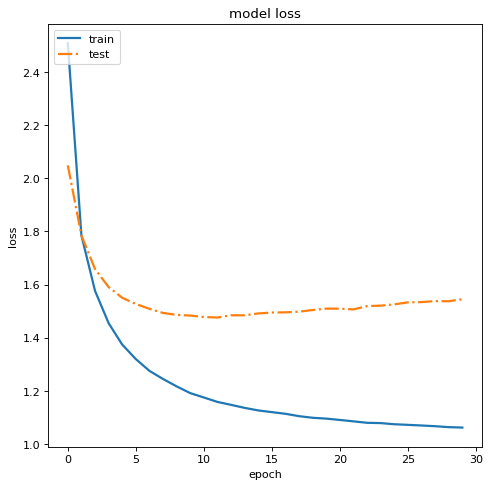

In [25]:
plt.figure(figsize=(7,7),dpi=80, facecolor='w',edgecolor='k')
plt.plot(history.history['loss'],'-',linewidth=2)

plt.plot(history.history['val_loss'],'-.',linewidth=2)
plt.title('model loss')
plt.xlabel("epoch")
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()   #4번째 epoch 부터는 train data에 대해서만 성능이 좋아지고 validation data에대해서는 성능이 낮아지거나 그대로다.즉 과적합 상태이다. 그러므로 epoch를 4로 하는것이 좋다.

In [27]:
score=model_v1.evaluate(x_test_vec,y_test_oh,batch_size=32,verbose=1)
print('test score:',np.round(score[0],3))
print('test accuracy:',np.round(score[1],3))

71/71 [==============================] - 0s 827us/step - loss: 1.4904 - accuracy: 0.6839
test score: 1.49
test accuracy: 0.684


In [28]:
def get_model(input_shape):
    inputs=Input(shape=(input_shape,))
    hidden1=Dense(256,activation='relu')(inputs)
    dropout=Dropout(0.5)(hidden1)
    outputs=Dense(46,activation='softmax')(dropout)
    
    model=Model(inputs,outputs)
    return model


In [29]:
model_v2=get_model(100)
model_v2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_2=model_v2.fit(x_train_vec,y_train_oh, batch_size=32, epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
225/225 [==============================] - 1s 2ms/step - loss: 2.4416 - accuracy: 0.4130 - val_loss: 1.5309 - val_accuracy: 0.6238
Epoch 2/30
225/225 [==============================] - 0s 2ms/step - loss: 1.5139 - accuracy: 0.6281 - val_loss: 1.3635 - val_accuracy: 0.6694
Epoch 3/30
225/225 [==============================] - 0s 2ms/step - loss: 1.3503 - accuracy: 0.6670 - val_loss: 1.2991 - val_accuracy: 0.6845
Epoch 4/30
225/225 [==============================] - 0s 2ms/step - loss: 1.2820 - accuracy: 0.6773 - val_loss: 1.2672 - val_accuracy: 0.6912
Epoch 5/30
225/225 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.6892 - val_loss: 1.2324 - val_accuracy: 0.6995
Epoch 6/30
225/225 [==============================] - 0s 2ms/step - loss: 1.1838 - accuracy: 0.7054 - val_loss: 1.2340 - val_accuracy: 0.7012
Epoch 7/30
225/225 [==============================] - 0s 2ms/step - loss: 1.1411 - accuracy: 0.7145 - val_loss: 1.2146 - val_accuracy: 0.7023
Epoch 

Text(0, 0.5, 'acc')

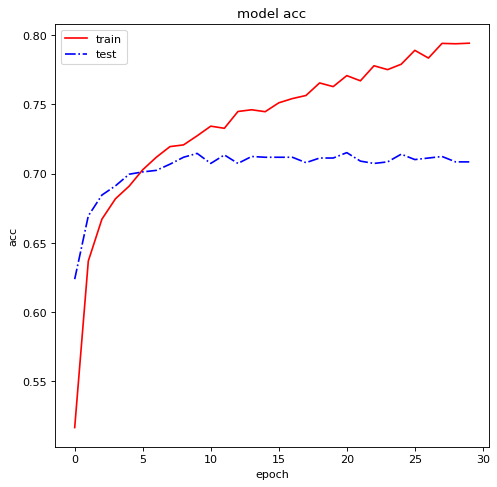

In [33]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history_2.history['accuracy'],'-',color='r')
plt.plot(history_2.history['val_accuracy'],'-.',color='b')
plt.legend(['train','test'],loc='upper left')
plt.title("model acc")
plt.xlabel('epoch')
plt.ylabel('acc')

Text(0, 0.5, 'loss')

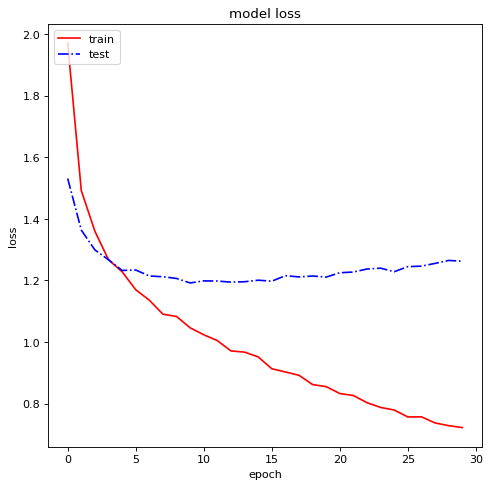

In [34]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history_2.history['loss'],'-',color='r')
plt.plot(history_2.history['val_loss'],'-.',color='b')
plt.legend(['train','test'],loc='upper left')
plt.title("model loss")
plt.xlabel('epoch')
plt.ylabel('loss')

In [37]:
score2=model_v2.evaluate(x_test_vec,y_test_oh,batch_size=32,verbose=1)
print('test score:',np.round(score2[0],3))
print('test accuracy:',np.round(score2[1],3))

71/71 [==============================] - 0s 955us/step - loss: 1.3009 - accuracy: 0.6879
test score: 1.301
test accuracy: 0.688


In [42]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000, test_split=0.2)

y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)

x_train_vec=vectorize_sequence(x_train,dimension=10000)
x_test_vec=vectorize_sequence(x_test,dimension=10000)

model=get_model(10000)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2560256   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 46)                11822     
Total params: 2,572,078
Trainable params: 2,572,078
Non-trainable params: 0
_________________________________________________________________


In [43]:
history3=model.fit(x_train_vec,y_train_oh, batch_size=32,epochs=30,verbose=1,validation_split=0.1)


Epoch 1/30
253/253 [==============================] - 5s 17ms/step - loss: 1.9088 - accuracy: 0.6026 - val_loss: 1.0400 - val_accuracy: 0.7775
Epoch 2/30
253/253 [==============================] - 4s 16ms/step - loss: 0.6358 - accuracy: 0.8618 - val_loss: 0.8646 - val_accuracy: 0.8154
Epoch 3/30
253/253 [==============================] - 4s 16ms/step - loss: 0.3395 - accuracy: 0.9274 - val_loss: 0.8844 - val_accuracy: 0.8198
Epoch 4/30
253/253 [==============================] - 4s 16ms/step - loss: 0.2322 - accuracy: 0.9482 - val_loss: 0.9244 - val_accuracy: 0.8209
Epoch 5/30
253/253 [==============================] - 4s 16ms/step - loss: 0.1866 - accuracy: 0.9559 - val_loss: 0.9837 - val_accuracy: 0.7875
Epoch 6/30
253/253 [==============================] - 4s 16ms/step - loss: 0.1709 - accuracy: 0.9559 - val_loss: 1.0157 - val_accuracy: 0.7987
Epoch 7/30
253/253 [==============================] - 4s 16ms/step - loss: 0.1633 - accuracy: 0.9582 - val_loss: 1.0219 - val_accuracy: 0.8042

In [45]:
score_3 = model.evaluate(x_test_vec,y_test_oh,batch_size=32,verbose=1)
print(score_3[0])
print(score_3[1]) 

71/71 [==============================] - 0s 5ms/step - loss: 1.3465 - accuracy: 0.8001
1.3465228080749512
0.8000890612602234


Text(0, 0.5, 'acc')

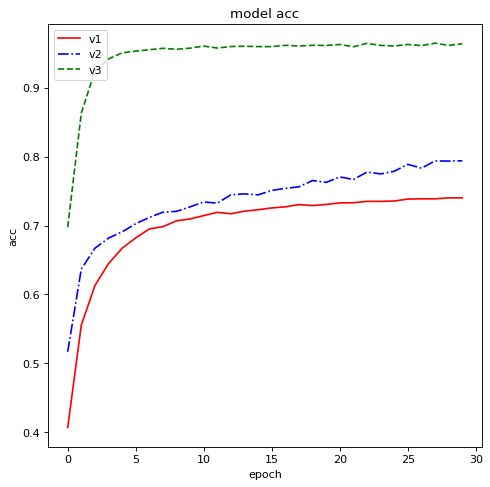

In [47]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history.history['accuracy'],'-',color='r')
plt.plot(history_2.history['accuracy'],'-.',color='b')
plt.plot(history3.history['accuracy'],'--',color='g')
plt.legend(['v1','v2','v3'],loc='upper left')
plt.title("model acc")
plt.xlabel('epoch')
plt.ylabel('acc')

Text(0, 0.5, 'acc')

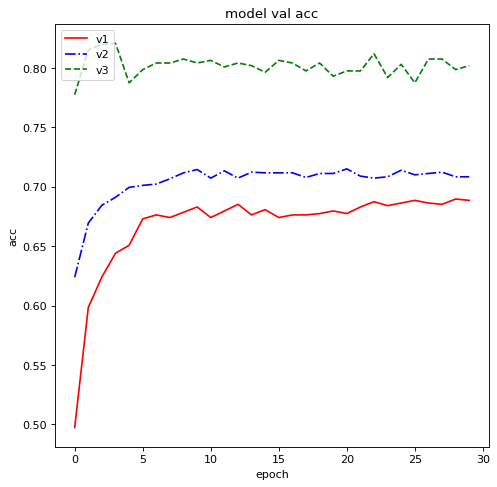

In [48]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history.history['val_accuracy'],'-',color='r')
plt.plot(history_2.history['val_accuracy'],'-.',color='b')
plt.plot(history3.history['val_accuracy'],'--',color='g')
plt.legend(['v1','v2','v3'],loc='upper left')
plt.title("model val acc")
plt.xlabel('epoch')
plt.ylabel('acc')